<span style="font-family:Helvetica; color:gray">These exercise materials provided to you as a student of Aalto University are protected by copyright. You are authorized to use these materials for your personal educational purposes, including completing the exercises and submitting them for grading. You are prohibited from reproducing, distributing, displaying, or sharing any portion of these materials in any form, including, but not limited to, posting on the internet or other forms of electronic communication. Aalto University reserves all rights in the exercise materials.</span>


## Exercise 1: Frienship paradox

In this warmup exercise you will demonstrate how the frienship paradox works. The friendship paradox states that most people have less friends than their friends do. A similar statement is actually true for most networks, and can be explained by the fact that following links lead to high degree nodes (more on this on lectures on social network structure). While we can understand this as bias in the sampling of people (=people with more friends are more likely to be friends with a random person), to a naive observer this might give an impression that everyone else is more popular than you even when this is not true. See also https://en.wikipedia.org/wiki/Friendship_paradox

In [2]:
import networkx as nx # Networkx is a library for manipulating networks
import random
import matplotlib.pyplot as plt

#### Creating a network
Let's first create an artificial social network. Social network here represents any social system: it can be the social network within a workplace, city or even a country, or it can represent an online social network. Here the network is just a collection of people, which we call nodes, and connections between them, which we also call links. The concepts you will need here are:
 - Node : A person
 - Link/connection : A link connects two nodes
 - Degree : The number of links a node has. A high degree value means that the person has a lot of connections and is popular
 - Neighbor: All the nodes that are connected by a link to a node are its neighbors


For the purpose of this exercise we will use the Barabasi-Albert model to generate an example network. This is a popular social network model that creates networks with few nodes (i.e., people) with many connections (i.e., high degree) and large number of people with small number of connects (i.e., low degree). You don't have to worry about the details of how this particular model works. 

The next block does 3 things:
1. It creates the network
2. It calculates positions for nodes in 2D space, which can be used for the visualisation.
3. It draws the network based on the positions

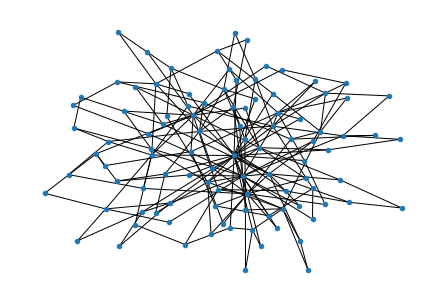

In [3]:
net = nx.barabasi_albert_graph(100, 2, seed=1234) # Create a Barabasi-Albert network
positions = nx.spring_layout(net) # Find locations for the nodes using spring layout algorithm
nx.draw(net, positions, node_size=20) # Draw the network using the node locations

#### Investigating random nodes
We start by investigating random nodes and their random neighbors. This code block samples a random node and its random neighbor. It then computes their degrees and prints them. Finally it draws the network with the random node highlighted in green and the random neighbor highlighted in red. You can run this code block multiple times to get the feeling of the phenomenon where the random node typically has smaller degree than its neighbor. Answer the first exercise question *1.3.1 Random sampling* in A+ after this.


Random node degree: 2
Random neighbor degree: 9


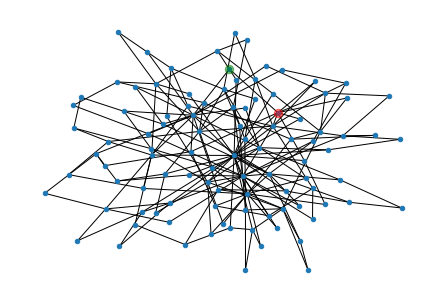

In [51]:
random_node = random.choice(list(net))
random_neighbor = random.choice(list(net.neighbors(random_node)))

print("Random node degree:", net.degree(random_node))
print("Random neighbor degree:", net.degree(random_neighbor))

plt.figure()
nx.draw(net, positions, node_size=20)
nx.draw_networkx_nodes(net, positions, nodelist=[random_node], node_color='green', node_size=70, alpha=0.5)
nx.draw_networkx_nodes(net, positions, nodelist=[random_neighbor], node_color='red', node_size=70, alpha=0.5)

#### Systematic approach
Let's next take a more systematic approach and compute the average degree of all nodes and the average of the average neighbor degrees. The function *get_average_neighborhood_degree* is automatically graded after you complete it and you submit this notebook to A+. Note that the A+ grades also the function *get_fraction_less_friends* that is defined below. However, you can submit the notebok 99 times, so it is possible to get *get_average_neighborhood_degree* graded before completing the full notebook.

In [27]:
def get_average_degree(net):
    """
    Calculate the average degree of nodes in a social network.

    Args:
    net (nx.Graph): A networkx graph object representing the social network.

    Returns:
    float: The average degree of nodes in the social network.

    Examples:
    >>> net = nx.Graph()
    >>> net.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4), (3, 5), (4, 5)])
    >>> get_average_degree(net)
    2.4
    """
    degree_sum=0
    for node, degree in net.degree():
        degree_sum+=degree
    return degree_sum/len(net)



def get_average_neighborhood_degree(net):
    """
    Calculates the average degree of neighbors for every node. Then returns
    the average of these averages.

    Args:
    net (nx.Graph): A networkx graph object representing the social network.

    Returns:
    float: The average degree of the neighbors of nodes in the social network.

    Examples:
    >>> net = nx.Graph()
    >>> net.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4), (3, 5), (4, 5)])
    >>> get_average_neighborhood_degree(net)
    2.8
    """
    # You should implement this function as an exercise.
    # Your code here.
    # This function will be automatically graded on A+.
    # You can either see the get_average_degree for example how to work with the
    # network and degrees, or you can use the NetworkX method average_neighbor_degree.

    neighbor_degree_sum = 0

    for node, degree in net.degree():
        neighbors = net.neighbors(node)
        numberOfNeighbors = degree
        neighbor_degree_each_node = 0
        for neighbor in neighbors:
            neighbor_degree_each_node += net.degree(neighbor)
        neighbor_degree_sum += neighbor_degree_each_node/numberOfNeighbors
    return neighbor_degree_sum / len(net)

    #return 0 # Replace this line

netTest = nx.Graph()
netTest.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4), (3, 5), (4, 5)])

print("Average degree:", get_average_degree(netTest))
print("Average neighborhood degree:",get_average_neighborhood_degree(netTest))


Average degree: 2.4
Average neighborhood degree: 2.8


#### Testing the friendship paradox
Finally, we will test the hypothesis that "most people have fewer friends than their neighbors (on average)". Again,  the function *get_average_neighborhood_degree* is automatically graded after you complete it and you submit this notebook to A+.

In [30]:
def get_fraction_less_friends(net):
    """
    Calculate the fraction of nodes in a social network that have fewer friends than their neighbors on average.

    Args:
    net (nx.Graph): A networkx graph object representing the social network.

    Returns:
    float: The fraction of nodes in the social network that have fewer friends than their neighbors.

    Examples:
    >>> net = nx.Graph()
    >>> net.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4), (3, 5), (4, 5)])
    >>> get_fraction_less_friends(net)
    0.8
    """
    # You should implement this function as an exercise.
    # Your code here.
    # This function will be automatically graded on A+.
    # This function should go through every node and compute the average of the degrees of its neighbors.
    # It then compares that average degree to the degree of the node itself, and reports the fraction
    # of nodes whose degree is less than that of the average of its neighbors.
    # You can again use the NetworkX function average_neighbor_degree or implement everything yourself.

    number_of_people_with_less_friends_than_neighbors = 0
    for node, degree in net.degree():
        average_neighbor_degree = sum([net.degree(neighbor) for neighbor in net.neighbors(node)])/degree
        if degree < average_neighbor_degree:
            number_of_people_with_less_friends_than_neighbors += 1
    fraction_less_friends = number_of_people_with_less_friends_than_neighbors/len(net)
    return fraction_less_friends
    #return 0 #replace this line

netTest = nx.Graph()
netTest.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4), (3, 5), (4, 5)])
print("Fraction of people with fewer friends than their neighbors have on average:", get_fraction_less_friends(netTest))


Fraction of people with fewer friends than their neighbors have on average: 0.8


#### Trying out other networks
Finally, you can try the friendship paradox with other networks. Here is an example with network that has nodes with degrees from 1 to 100. This network will have less variance in the degrees than the ones created with the Barabasi-Albert model. After completing this notebook you can answer the question *1.3.2 Systematic analysis* in A+.

In [57]:
print("Barabasi-Albert Graph")
print("Average degree:", get_average_degree(net))
print("Average neighborhood degree:", get_average_neighborhood_degree(net))
print("Fraction of people with less friends than their neighbors have on average:", get_fraction_less_friends(net))

Barabasi-Albert Graph
Average degree: 3.92
Average neighborhood degree: 7.300971370734529
Fraction of people with less friends than their neighbors have on average: 0.8


In [56]:
net2 = nx.random_degree_sequence_graph(10*list(range(1, 101)))
print("Graph degree 1 to 100")
print("Average degree:", get_average_degree(net2))
print("Average neighborhood degree:", get_average_neighborhood_degree(net2))
print("Fraction of people with less friends than their neighbors have on average:", get_fraction_less_friends(net2))

Graph degree 1 to 100
Average degree: 50.5
Average neighborhood degree: 67.1359175425931
Fraction of people with less friends than their neighbors have on average: 0.667
